In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

데이터에 누락값(결측치)이 없으면 좋겠지만 누락값은 대부분의 데이터에 존재하고 깔끔한 데이터를 위새 누락값을 처리하는 것은 매우 중요하다.  
누락값은 NaN으로 표기되며 누락값 자체를 사용해보려면 numpy 라이브러리가 필요하다.

In [2]:
# 누락값을 사용하기 위해 numpy에서 누락값을 import 한다.
from numpy import NaN, NAN, nan

In [6]:
# 누락값은 0, ''과 같은 값과는 다른 개념으로 데이터 자체가 없다는 것을 의미한다. => NULL => '같다'라는 개념도 없다.
print(NaN == True)
print(NaN == False)
print(NaN == 0)
print(NaN == '')

False
False
False
False


In [8]:
# 누락값은 값 자체가 없기 때문에 자기 자신과 비교해도 False가 출력된다.
print(NaN == NaN)
print(NAN == NAN)
print(nan == nan)

False
False
False


In [11]:
# pandas는 누락값을 확인하는 isnull(), isna() 메소드가 있고 누락값이면 True, 누락값이 아니면 False를 리턴한다.
print(pd.isnull(NaN))
print(pd.isnull(NAN))
print(pd.isnull(nan))
print(pd.isnull(0))
print(pd.isnull(''))

True
True
True
False
False


In [12]:
print(pd.isna(NaN))
print(pd.isna(NAN))
print(pd.isna(nan))
print(pd.isna(0))
print(pd.isna(''))

True
True
True
False
False


In [13]:
# notnull(), notna() 메소드와 반대로 누락값이 아닌가 확인하는 notnull(), notna() 메소드가 있고 누락값이면 False, 
# 누락값이 아니면 True를 리턴한다.
print(pd.notnull(NaN))
print(pd.notnull(NAN))
print(pd.notnull(nan))
print(pd.notnull(0))
print(pd.notnull(''))

False
False
False
True
True


In [15]:
print(pd.notna(NaN))
print(pd.notna(NAN))
print(pd.notna(nan))
print(pd.notna(0))
print(pd.notna(''))

False
False
False
True
True


누락값 개수

In [17]:
# Cases_* => 국가별 발병자 수, Deaths_* => 국가별 사망자 수
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0            NaN            10030.0   
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0              NaN            NaN                 NaN          NaN   
1              NaN            NaN                 NaN          NaN   
2              NaN            NaN                 NaN          NaN   
3              NaN            NaN                 NaN          NaN   
4              NaN            NaN                 NaN          NaN   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
0           NaN         1786.0             NaN              2977.0   
1           NaN         1781.0             NaN              2943.0   
2           NaN         1767.0          3496.0              2915.0   
3           NaN            NaN          3496.0                 NaN   
4           NaN         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
0               NaN             NaN                  NaN           NaN   
1               NaN             NaN                  NaN           NaN   
2               NaN             NaN                  NaN           NaN   
3               NaN             NaN                  NaN           NaN   
4               NaN             NaN                  NaN           NaN   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

In [42]:
# numpy의 count_nonzero() 메소드는 0 또는 False가 아닌 데이터의 개수를 센다. 문자가 입력되면 오동작한다.
print(np.count_nonzero([False, 0, True, 1]))
print(np.count_nonzero(ebola.isnull())) # ebola 데이터프레임의 전체 누락값 개수
print(np.count_nonzero(ebola['Cases_Guinea'].isnull())) # ebola 데이터프레임 Cases_Guinea 열의 누락값 개수
print(np.count_nonzero(ebola.get('Cases_Liberia').isnull())) # ebola 데이터프레임 Cases_Liberia 열의 누락값 개수
print(np.count_nonzero(ebola.Cases_SierraLeone.isnull())) # ebola 데이터프레임 Cases_SierraLeone 열의 누락값 개수

2
1214
29
39
35


In [47]:
# count() 메소드는 누락값이 아닌 데이터의 개수를 센다.
print(ebola.shape)
print(ebola.shape[0])
print(ebola.shape[0] - ebola.count())

(122, 18)
122
Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


In [49]:
# value_counts() 메소드 시리즈에 저장된 데이터의 빈도수를 얻어올 수 있다.
print(type(ebola.Cases_Guinea))
print(ebola.Cases_Guinea.value_counts())

<class 'pandas.core.series.Series'>
86.0      3
112.0     2
390.0     2
495.0     2
2597.0    1
         ..
235.0     1
231.0     1
226.0     1
224.0     1
2776.0    1
Name: Cases_Guinea, Length: 88, dtype: int64


In [52]:
# value_counts() 메소드는 dropna 옵션의 기본값이 True로 설정되어 있어서 기본적으로 누락값을 무시하고 데이터의
# 빈도수를 얻어온다. 누락값을 포함한 데이터의 빈도수를 얻어오려면 dropna=False 옵션을 지정한다.
print(ebola.Cases_Guinea.value_counts(dropna=False))

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
235.0      1
231.0      1
226.0      1
224.0      1
2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64


누락값의 분포 위치를 확인하는 missingno 라이브러리

pip install missingno

In [53]:
import missingno as msno

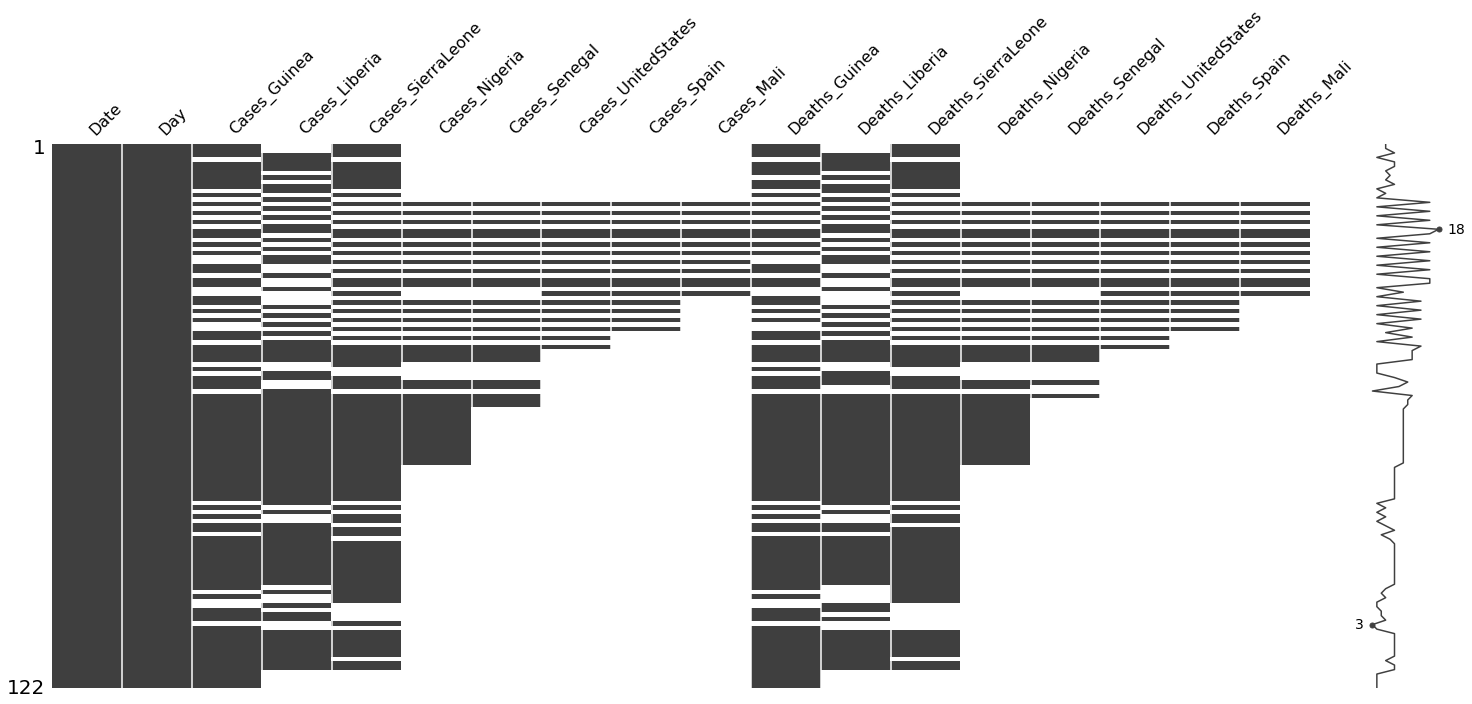

In [55]:
msno.matrix(ebola)
plt.show()

누락값 처리하기

In [56]:
print(ebola.iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0            NaN             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0            NaN             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [57]:
# fillna() 메소드의 인수로 특정 데이터를 지정하면 누락값이 지정한 데이터로 변경된다.
print(ebola.fillna(0).iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            0.0            10030.0
1    1/4/2015  288        2775.0            0.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           0.0         8157.0                0.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0            0.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0            0.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [58]:
# fillna() 메소드의 method 옵션을 'ffill'로 지정하면 누락값이 나타나기 바로 전 값으로 누락값을 변경한다.
print(ebola.fillna(method='ffill').iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2769.0         8157.0             9722.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         8018.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7977.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [60]:
# fillna() 메소드의 method 옵션을 'bfill'로 지정하면 누락값이 나타나기 바로 다음 값으로 누락값을 변경한다.
print(ebola.fillna(method='bfill').iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0         8166.0            10030.0
1    1/4/2015  288        2775.0         8166.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2730.0         8157.0             9633.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7977.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7862.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [61]:
# interpolate() 메소드는 누락값 양쪽의 데이터를 이용해서 중간값(평균)으로 누락값을 변경한다.
print(ebola.interpolate().iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2749.5         8157.0             9677.5
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7997.5             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7919.5             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


누락값 삭제하기

In [63]:
# dropna() 메소드는 누락값이 포함된 데이터(행)을 삭제한다.
ebola_dropna = ebola.dropna()
ebola_dropna

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
19  11/18/2014  241        2047.0         7082.0             6190.0   

    Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
19           20.0            1.0                 4.0          1.0         6.0   

    Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
19         1214.0          2963.0              1267.0             8.0   

    Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
19             0.0                  1.0           0.0          6.0

누락값이 하나라도 있으면 연산자를 사용한 계산 결과도 누락값이 된다.

In [64]:
ebola_subset = ebola.loc[:, ['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone']]
ebola_subset

Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0          2776.0            NaN            10030.0
1          2775.0            NaN             9780.0
2          2769.0         8166.0             9722.0
3             NaN         8157.0                NaN
4          2730.0         8115.0             9633.0
..            ...            ...                ...
117         103.0            8.0                6.0
118          86.0            NaN                NaN
119          86.0            NaN                NaN
120          86.0            NaN                NaN
121          49.0            NaN                NaN

[122 rows x 3 columns]

In [65]:
ebola_subset['Cases_Total'] = ebola_subset.Cases_Guinea + ebola_subset.Cases_Liberia + ebola_subset.Cases_SierraLeone
ebola_subset

Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Total
0          2776.0            NaN            10030.0          NaN
1          2775.0            NaN             9780.0          NaN
2          2769.0         8166.0             9722.0      20657.0
3             NaN         8157.0                NaN          NaN
4          2730.0         8115.0             9633.0      20478.0
..            ...            ...                ...          ...
117         103.0            8.0                6.0        117.0
118          86.0            NaN                NaN          NaN
119          86.0            NaN                NaN          NaN
120          86.0            NaN                NaN          NaN
121          49.0            NaN                NaN          NaN

[122 rows x 4 columns]

기초 통계를 계산하는 메소드는 skipna 옵션이 True가 기본값으로 설정되어 있어서 누락값을 무시하고 메소드가 실행된다.

In [74]:
print(ebola_subset.Cases_Guinea.sum()) # skipna 옵션을 생략해서 True가 기본값으로 사용된다.
print(ebola_subset.Cases_Guinea.sum(skipna=True))
# skipna 옵션을 False로 지정하면 누락값을 포함한 연산을 해서 메소드 실행 결과가 누락값이 된다.
print(ebola_subset.Cases_Guinea.sum(skipna=False))
print(ebola_subset.Cases_Guinea.mean())
print(ebola_subset.Cases_Guinea.max())
print(ebola_subset.Cases_Guinea.min())
print(ebola_subset.Cases_Guinea.count())
# count() 메소드는 skipna 옵션을 지원하지 않고 누락값은 자동으로 무시한다.
# print(ebola_subset.Cases_Guinea.count(skipna=False)) # 에러

84729.0
84729.0
nan
911.0645161290323
2776.0
49.0
93
